In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

Our first dataset is the "tips" dataset. This dataset is used to train a model to predict tip based on total bill, whether the person is smoker, male or female, day, size of table and food of the day.

In [2]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Our second dataset is the "anscombe" dataset. This dataset contains four groups(I, II, III, IV) containing four different arrangement of points.

In [3]:
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


## 1. Facet Grid

Facetgrid plots a multi-plot grid for plotting conditional relationships. The basic workflow is to initialize the "FacetGrid" object with the dataset and the variables that are used to structure the grid. Then one or more plotting functions can be applied to each subset by calling "FacetGrid.map" or "FacetGrid.map_dataframe". Finally, the plot can be tweaked with other methods to do things like change the axis labels, use different ticks, or add a legend.

Facetgrid can also represent levels of a third variable with the "hue" parameter, which plots different subsets of data in different colors. This uses color to resolve elements on a third dimension, but only draws subsets on top of each other and will not tailor the "hue" parameter for the specific visualization the way that axes-level functions that accept "hue" will.

"smoker" column has two categories i.e. smoker and non-smoker.

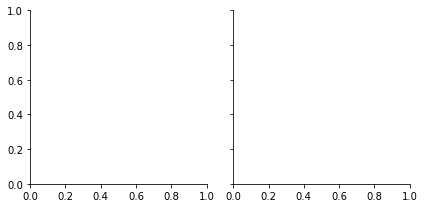

In [4]:
sns.FacetGrid(tips, col="smoker")

"day" column has four categories i.e. Sun, Sat, Thur, Fri.

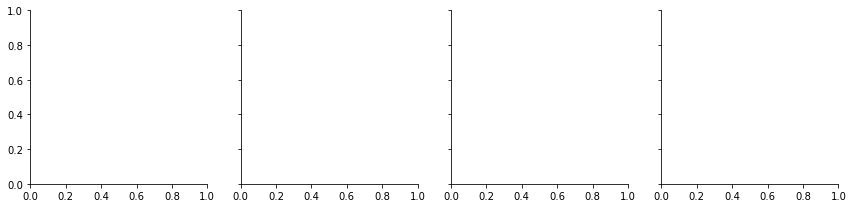

In [5]:
sns.FacetGrid(tips, col="day")

we have 4 categories for "day" and 2 categories for "sex" so total of 4*2=8 grids.

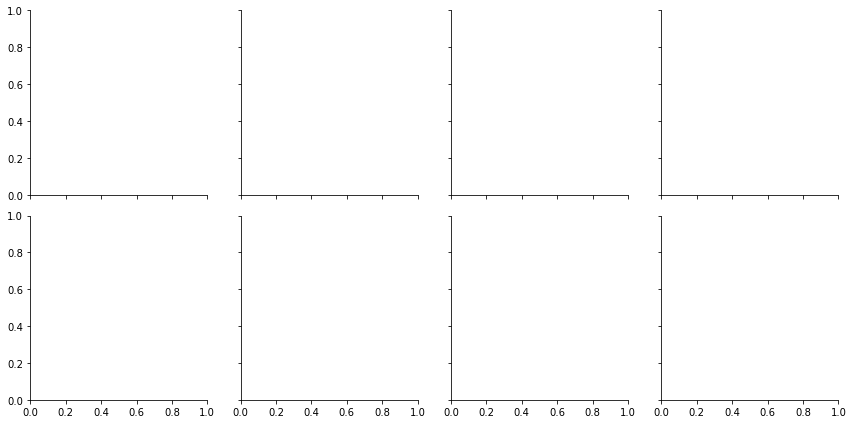

In [6]:
sns.FacetGrid(tips, col="day", row="sex")

After forming the grid we can use "map" function to add plots to the grids. Note that the values of grid, example, smoker=Yes|time=Lunch acts as a filter for selecting data (from x and y) used for plotting in that grid. If there are "n" grids, "n" references to the dataset will be created for plotting in each grid. Understand that after creating "n" references we won't have access to original dataframe. Notice, "map" function doesn't include dataframe name.

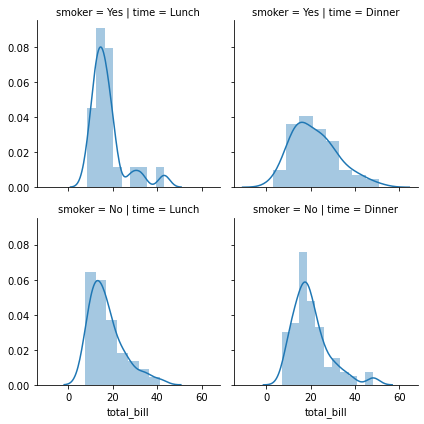

In [7]:
(sns.FacetGrid(tips, col="time", row="smoker")).map(sns.distplot, "total_bill")

We can use parameters like "color", "col_order" that doesn't need to reference to original dataframe with "map" function.

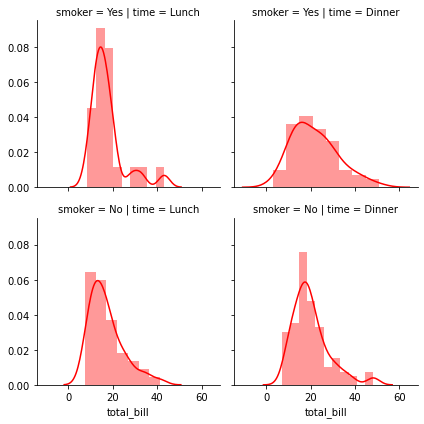

In [8]:
(sns.FacetGrid(tips, col="time", row="smoker")).map(sns.distplot, "total_bill", color="r")

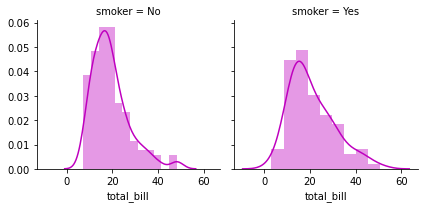

In [9]:
(sns.FacetGrid(tips, col="smoker", col_order=["No", "Yes"])
).map(sns.distplot, "total_bill", color="m")

Since we won't have access to orginal dataframe after creating reference, we won't be able to use parameters that require data from the original dataframe. Note that the code below will not work.

ValueError: Could not interpret input 'size'

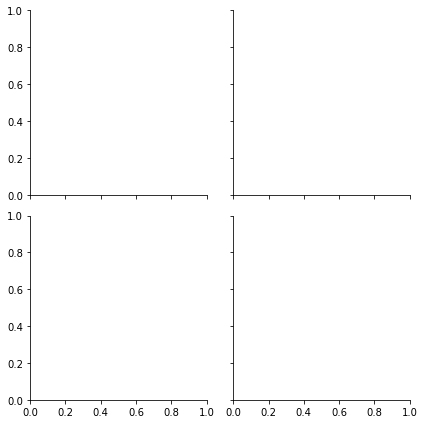

In [10]:
(sns.FacetGrid(tips, col="time", row="smoker")
).map(sns.scatterplot, "total_bill", "tip", size="size")

To overcome the problem we can use "map_dataframe" function. When we use "map_dataframe" we have access to all the data from our original dataframe.

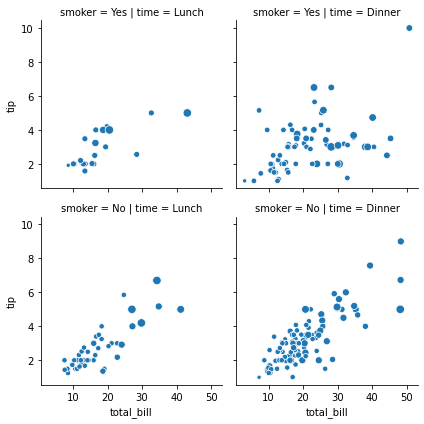

In [11]:
(sns.FacetGrid(tips, col="time", row="smoker")
).map_dataframe(sns.scatterplot, "total_bill", "tip", size="size")

We can use "set_axis_labels" for updating axis name. 

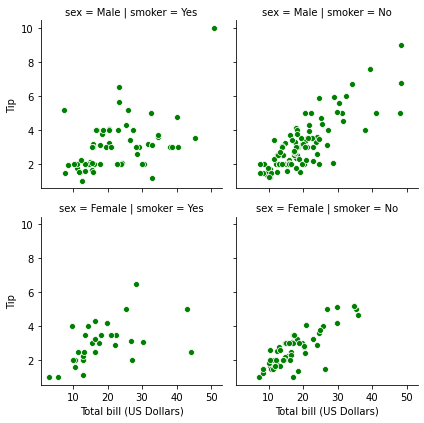

In [12]:
((sns.FacetGrid(tips, col="smoker", row="sex")
 ).map(sns.scatterplot, "total_bill", "tip", color="g")
).set_axis_labels("Total bill (US Dollars)", "Tip")

We can use "set_titles" for updating grid name. 

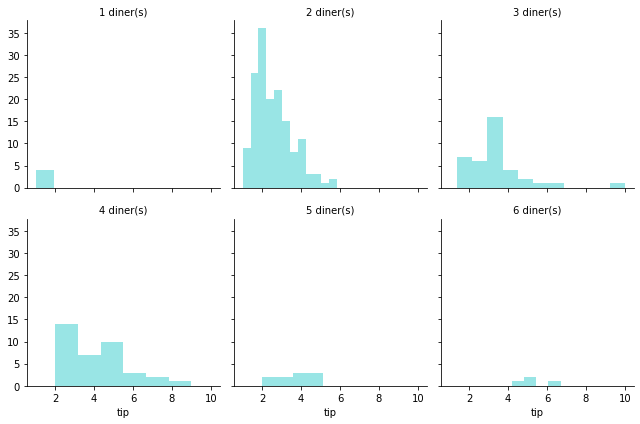

In [13]:
((sns.FacetGrid(tips, col="size", col_wrap=3)
 ).map(sns.distplot, "tip", color="c", kde=False)
).set_titles("{col_name} diner(s)")

## 2. lmplot - linear model plot

It is intended as a convenient interface to fit regression models across conditional subsets of a dataset i.e. combination of "regplot" and "FacetGrid". When thinking about how to assign variables to different facets, a general rule is that it makes sense to use "hue" for the most important comparison, followed by "col" and "row". However, always think about your particular dataset and the goals of the visualization you are creating.

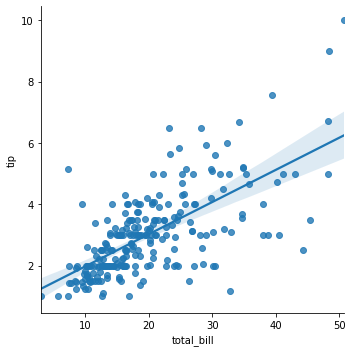

In [14]:
sns.lmplot(x="total_bill", y="tip", data=tips)

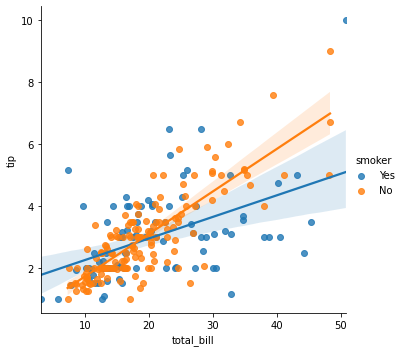

In [15]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

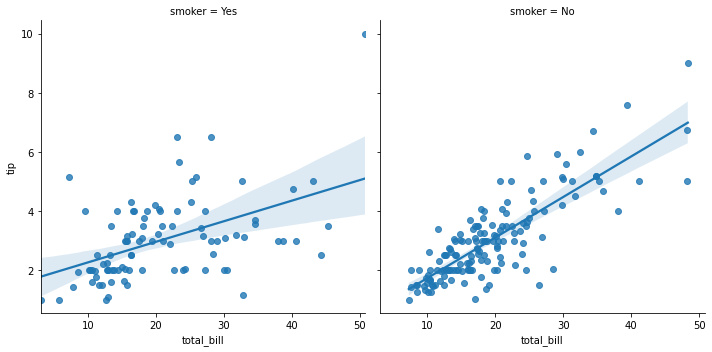

In [16]:
sns.lmplot(x="total_bill", y="tip", col="smoker", data=tips)

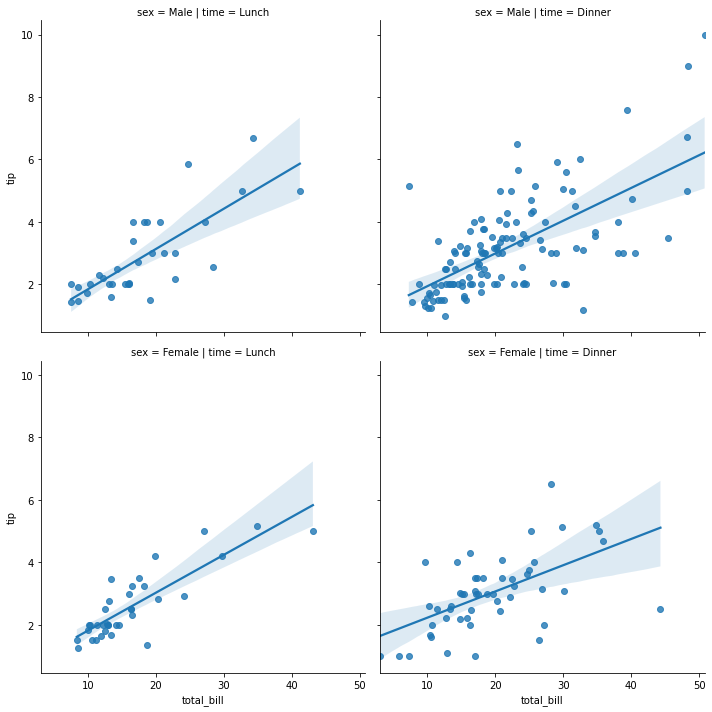

In [17]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time", data=tips)

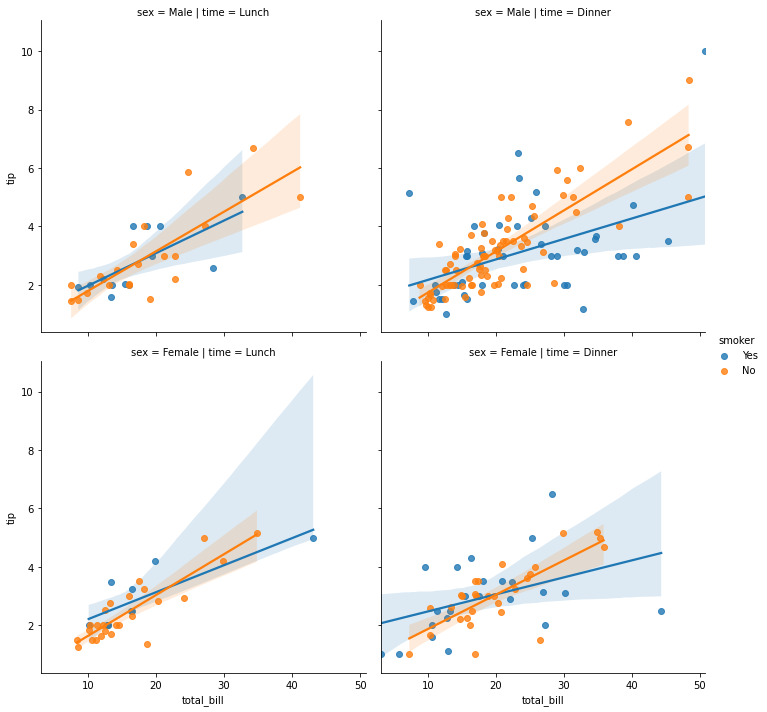

In [18]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips)

Using regplot with ordinal categories is often not so intuitive. We can change some parameters to help the process more intuitive.

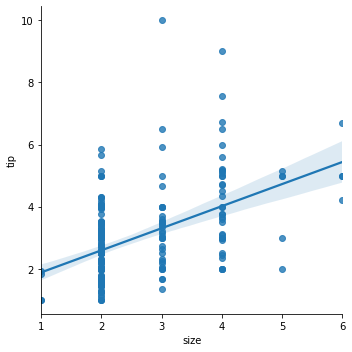

In [19]:
sns.lmplot(x="size", y="tip", data=tips)

We can add jitter to show how densely points are located in different regions. It can help to understand why regression plot passed through certain regions. The regression is still fit to the original data.

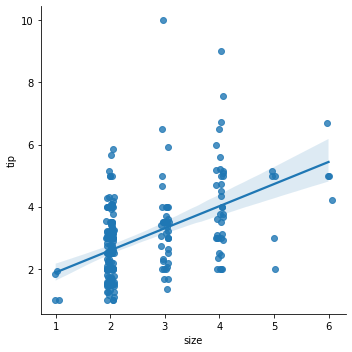

In [20]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=0.07)

We can use mean of the dependent value for each discrete value. The regression is still fit to the original data.

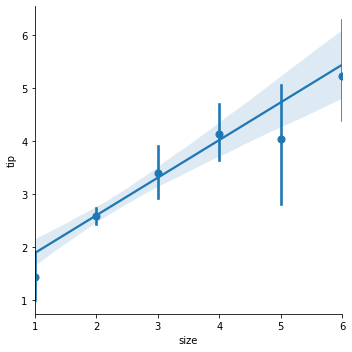

In [21]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean)

We can change confidence interval for for the estimator using "x_ci" parameter and confidence interval for regression line using "ci" parameter.

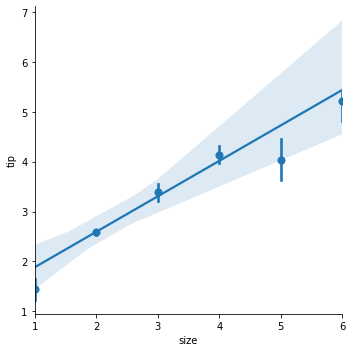

In [22]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean, x_ci=50, ci=100)

We can bin the "x" variable into discrete bins and then estimate the central tendency and a confidence interval using "x_bin" parameter. This binning only influences how the scatterplot is drawn; the regression is still fit to the original data. This parameter is interpreted either as the number of evenly-sized (not necessary spaced) bins or the positions of the bin centers. When this parameter is used, it implies that the default of "x_estimator" is "numpy.mean".    

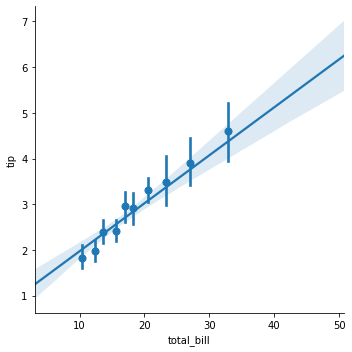

In [23]:
sns.lmplot(x="total_bill", y="tip", data=tips, x_bins=10)

The first set of anscombe dataset shows somewhat linear relationship and works well with simple linear regression model.

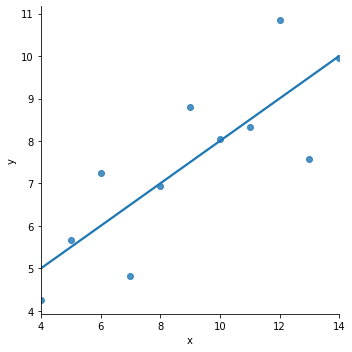

In [24]:
sns.lmplot(x="x", y="y", data=anscombe.loc[anscombe.dataset=="I", :], ci=None)

The second set is not linear and linear regression fails to fit the data well. We can change the size of points using "scatter_kws" parameter.

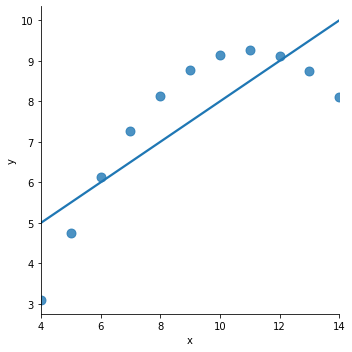

In [25]:
sns.lmplot(x="x", y="y", data=anscombe.loc[anscombe.dataset=="II", :],
           ci=None, scatter_kws={"s":80})

We can use "order" parameter to fit a polynomial regression to our dataset. If "order" is greater than 1, lmplot uses "numpy.polyfit" to estimate a polynomial regression.

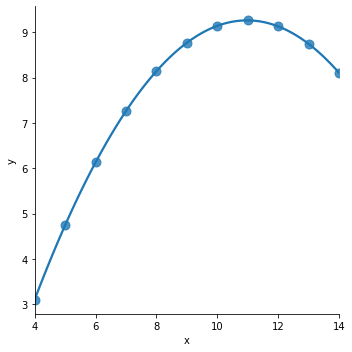

In [26]:
sns.lmplot(x="x", y="y", data=anscombe.loc[anscombe.dataset=="II", :],
           order=2, ci=None, scatter_kws={"s":80})

In the third dataset there is an outlier which affects the linear model and shift it towards itself although the trend of data is evident.

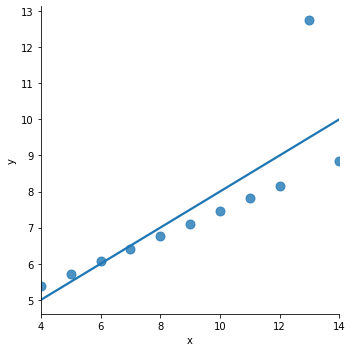

In [27]:
sns.lmplot(x="x", y="y", data=anscombe.loc[anscombe.dataset=="III", :],
           ci=None, scatter_kws={"s":80})

We can use the parameter "robust=True" to overcome this problem. This will de-weight outliers. Note that this is substantially more computationally intensive than standard linear regression, so we may wish to decrease the number of bootstrap resamples ("n_boot") or set "ci" to None.

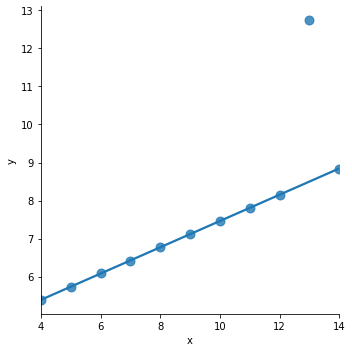

In [28]:
sns.lmplot(x="x", y="y", data=anscombe.loc[anscombe.dataset=="III", :],
           ci=None, robust=True, scatter_kws={"s":80})

We will create a new column called "big_tip" to classify whether the tip was "big" i.e. greater than 15% of total bill. 

In [29]:
tips["big_tip"] = (tips.tip/tips.total_bill)>0.15
tips

,total_bill,tip,sex,smoker,day,time,size,big_tip
0,16.99,1.01,Female,No,Sun,Dinner,2,False
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,False
4,24.59,3.61,Female,No,Sun,Dinner,4,False
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,True
240,27.18,2.00,Female,Yes,Sat,Dinner,2,False
241,22.67,2.00,Male,Yes,Sat,Dinner,2,False
242,17.82,1.75,Male,No,Sat,Dinner,2,False


We can fit a linear regression model to the data and define a threshold, for example 0.5, and classify values above the threshold as one category and below threshold as another.

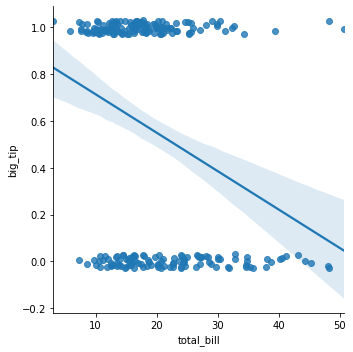

In [30]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=0.03)

For classification problem, logistic regression is better option than linear regression. Logistic regression defines a boder and points on different sides fall under different categories. We can use "logistic" parameter to fit logistic regression. If "True", assume that "dependent variable - y" is a binary variable and use "statsmodels" to estimate a logistic regression model. Note that this is substantially more computationally intensive than linear regression, so we may wish to decrease the number of bootstrap resamples ("n_boot") or set "ci" to None.

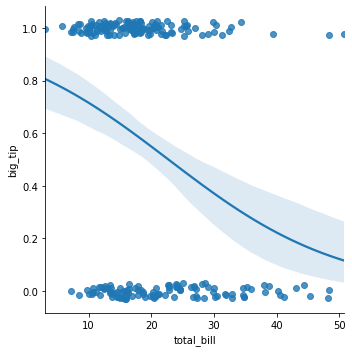

In [31]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=0.03)

If our data shows change in trend between intervals we can use locally weighted linear regression model. We use "lowess" parameter for this purpose. If "True", uses "statsmodels" to estimate a nonparametric lowess model (locally weighted linear regression). Note that confidence intervals cannot currently be drawn for this kind of model.

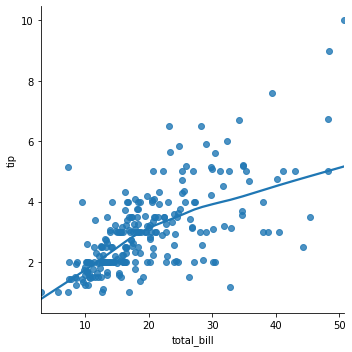

In [32]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True)

The parameter "logx" if "True", estimate a linear regression of the form y ~ log(x), but plot the scatterplot and regression model in the input space. Note that "x" must be positive for this to work.

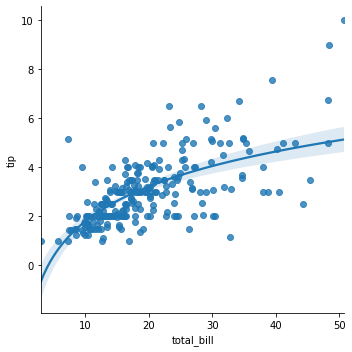

In [33]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           logx=True)

The parameter "truncate" if "True", the regression line is bounded by the data limits. If "False", it extends to the "x" axis limits.

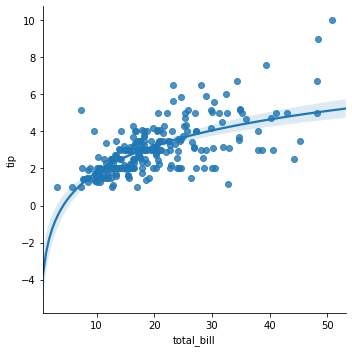

In [34]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           logx=True, truncate=False)

## 3. residplot - Residual plot

residplot is used to plot the residuals of a linear regression model. This function will regress y (dependent variable) on x (independent variable) (possibly as a robust or polynomial regression) and then draw a scatterplot of the residuals. 

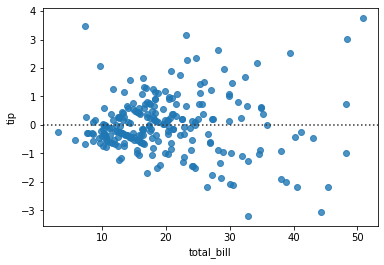

In [35]:
sns.residplot(x="total_bill", y="tip", data=tips)

We can optionally fit a lowess smoother to the residual plot, which can help in determining if there is structure to the residuals. Here, the residuals seem fairly random.

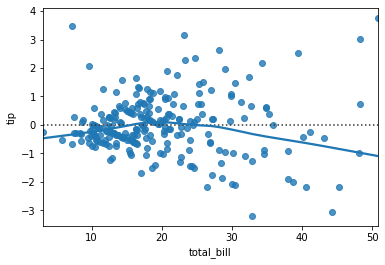

In [36]:
sns.residplot(x="total_bill", y="tip", data=tips,
              lowess=True)

We can also check residuals for different order of regression. 

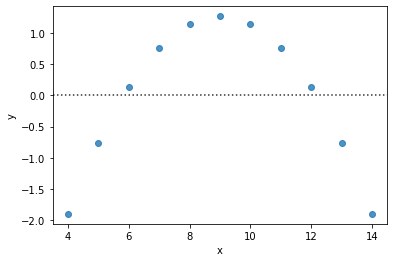

In [37]:
sns.residplot(x="x", y="y", data=anscombe.loc[anscombe.dataset=="II", :])

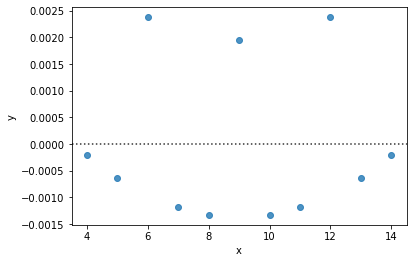

In [38]:
sns.residplot(x="x", y="y", data=anscombe.loc[anscombe.dataset=="II", :],
              order=2)

We can use "robust" parameters with residuals too. It represent residuals if the model was generated using "robust" parameter.

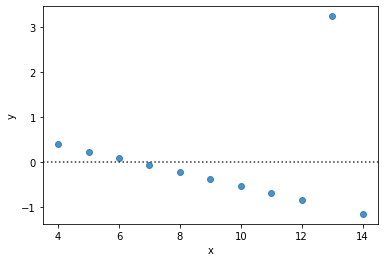

In [39]:
sns.residplot(x="x", y="y", data=anscombe.loc[anscombe.dataset=="III", :])

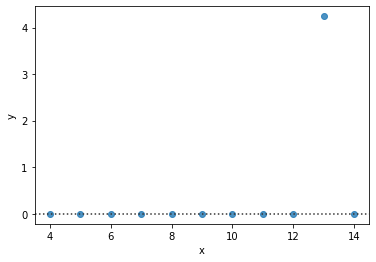

In [40]:
sns.residplot(x="x", y="y", data=anscombe.loc[anscombe.dataset=="III", :],
              robust=True)